## data structure && basic function

In [1296]:
import numpy as np
import matplotlib.pyplot as plt

In [1297]:
class LineSegment:
    def __init__(self, midpoint=None, slope=None, left_endpoint=None, right_endpoint=None):
        if midpoint is not None and slope is not None:
            # 根据中点和斜率初始化
            self.midpoint = midpoint
            self.slope = slope
            self.calculate_endpoints()
            self.calculate_length()
        elif left_endpoint is not None and slope is not None:
            # 根据左端点和斜率初始化
            self.endpoint1 = left_endpoint
            self.slope = slope
            self.calculate_midpoint_and_right_endpoint()
            self.calculate_length()
        elif right_endpoint is not None and slope is not None:
            # 根据右端点和斜率初始化
            self.endpoint2 = right_endpoint
            self.slope = slope
            self.calculate_midpoint_and_left_endpoint()
            self.calculate_length()
        else:
            raise ValueError("Invalid arguments. Please provide either midpoint and slope, left_endpoint and slope, or right_endpoint and slope.")

    def calculate_endpoints(self):
        # 根据中点和斜率计算两端点坐标
        x_mid, y_mid = self.midpoint
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x1 = x_mid - delta_x
        y1 = y_mid - self.slope * delta_x
        x2 = x_mid + delta_x
        y2 = y_mid + self.slope * delta_x

        self.endpoint1 = (x1, y1)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_right_endpoint(self):
        # 根据左端点和斜率计算中点和右端点
        x1, y1 = self.endpoint1
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x1 + delta_x
        y_mid = y1 + self.slope * delta_x
        x2 = x1 + 2 * delta_x
        y2 = y1 + 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_left_endpoint(self):
        # 根据右端点和斜率计算中点和左端点
        x2, y2 = self.endpoint2
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x2 - delta_x
        y_mid = y2 - self.slope * delta_x
        x1 = x2 - 2 * delta_x
        y1 = y2 - 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint1 = (x1, y1)

    def calculate_length(self):
        # 计算直线段的长度
        length = ((self.endpoint2[0] - self.endpoint1[0])**2 +
                  (self.endpoint2[1] - self.endpoint1[1])**2)**0.5
        self.length = length

    def get_endpoints(self):
        return self.endpoint1, self.endpoint2

    def get_midpoint(self):
        return self.midpoint

    def get_slope(self):
        return self.slope
    
    def intercept(self):
        return self.midpoint[1] - self.slope * self.midpoint[0]


In [1298]:
def plot_line_segments(line_segments, fig=None, ax=None):
    # 如果没有传递 fig 和 ax，则创建一个新的图形和子图对象
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    # 遍历 LineSegment 列表，绘制每一条线段
    for line_segment in line_segments:
        # 获取端点坐标
        endpoints = line_segment.get_endpoints()
        x_values = [endpoints[0][0], endpoints[1][0]]
        y_values = [endpoints[0][1], endpoints[1][1]]

        # 绘制线段
        ax.plot(x_values, y_values , linestyle='-', label=f'Slope: {line_segment.get_slope()}')

    # 添加标签和标题
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_title('Line Segments Plot')

    # 显示图例
    # ax.legend()

    # 如果在函数内部创建了新的图形和子图对象，则显示图形
    if fig is None or ax is None:
        plt.show()

    # 返回图形和子图对象的引用，以便进一步操作（可选）
    return fig, ax


def print_line_segments(line_segments_array):
    for idx, line_segment in enumerate(line_segments_array, start=1):
        print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
        print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
        print(f"Line {idx} - Slope: {line_segment.get_slope()}")
        print(f"Line {idx} - intercept: {line_segment.intercept()}")


def lineplot(p1, p2, label=None):
    endpoints = (p1, p2)
    x_values = [endpoints[0][0], endpoints[1][0]]
    y_values = [endpoints[0][1], endpoints[1][1]]
    #ax.plot(x_values, y_values, marker='o', linestyle='-', label=label)
    ax.plot(x_values, y_values,  linestyle='-', label=label)




In [1299]:
def updateLeft(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    right_endpoint = existing_line.get_endpoints()[0]

    new_line = LineSegment(right_endpoint=right_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)

def updateRight(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]
    left_endpoint = existing_line.get_endpoints()[1]

    new_line = LineSegment(left_endpoint=left_endpoint, slope=slope)


    line_segments_array.insert(index + 1, new_line)

In [1300]:
def reflect_slope(k1,k):
    return ((k*k-1)+2*k/k1)/(2*k-(k*k-1)/k1)

    
def reflect_simple(index,line_segments_array,tag,k1 = None):
    
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #k1 = 1000000000

    # 入射
    p1 = line_segments_array[index].get_midpoint()
    p2 = (- line_segments_array[index].get_midpoint()[1]/k1 + line_segments_array[index].get_midpoint()[0], 25)
    #print(f"xpoints: {p1} - ypoints: {p2}")
    lineplot(p1, p2, label=f'Slope: {line_segments_array[index].get_slope()}')
    

    # 反射
    slope = reflect_slope(k1,line_segments_array[index].get_slope())
    line = LineSegment(left_endpoint=line_segments_array[index].get_endpoints()[tag], slope=slope)
    p3 = (0, line.intercept())
    print(line.intercept())
    lineplot(p1, p3, label=f'Slope: {line_segments_array[index].get_slope()}')


def degree_incident_light_is(d):
    reflect_simple(0, line_segments_arrayR, 1, d)
    reflect_simple(0, line_segments_arrayL, 0, d)

    reflect_simple(5, line_segments_arrayR, 1, d)
    reflect_simple(5, line_segments_arrayL, 0, d)

    for i in range(1, 15):
        reflect_simple(20 * i, line_segments_arrayR, 1, d)

    for i in range(1, 15):
        reflect_simple(20 * i, line_segments_arrayL, 0, d)
    


## circle

In [1301]:
def draw_circle(fig=None, ax=None):

    radius = 300
    center = (0, 0)
    theta = np.linspace(np.pi, 2 * np.pi, 1000)  # 修改theta的范围，只考虑下半圆周
    circle_x = radius * np.cos(theta) + center[0]
    circle_y = radius * np.sin(theta) + center[1]

    incident_angle = np.linspace(0, 2 * np.pi, 30)
    reflection_interval = [-np.pi/9, np.pi/9]

    ax.plot(circle_x, circle_y, label='Circle')

def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value


def find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL):

    left_endpoint1 = (0, -300)
    slope1 = - circle_slope(0)
    line1 = LineSegment(right_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = - circle_slope(i)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)


    right_endpoint1 = (0, -300)
    slope1 = circle_slope(0)
    line1 = LineSegment(left_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = circle_slope(i)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)

0.0001388889338613808
0.0001388889339182242
-136.3878065077489
-136.3878065077489
-146.68922753344344
-149.51956432071677
-151.85437224720854
-154.6238722499183
-158.0685720508979
-162.33097574769033
-167.54665182032954
-173.873491082982
-181.50997650466425
-190.71421916907198
-201.8293218990305
-215.32075342184476
-231.83447276513567
-252.2913813884743
-146.68922753344347
-149.5195643207168
-151.85437224720854
-154.62387224991835
-158.0685720508979
-162.33097574769027
-167.54665182032952
-173.87349108298199
-181.50997650466422
-190.71421916907198
-201.8293218990305
-215.32075342184478
-231.83447276513564
-252.29138138847435


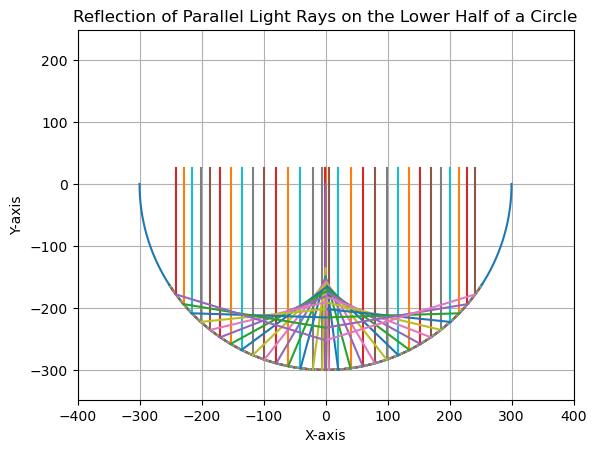

In [1302]:
# circle
fig, ax = plt.subplots()


# draw a circle 
draw_circle(fig, ax)


# draw a bunch of  line segments to fit the circle 
line_segments_arrayR = []
line_segments_arrayL = []

find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL)
    
# print_line_segments(line_segments_arrayR)
# print("###########################################################")
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(None)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

plt.title('Reflection of Parallel Light Rays on the Lower Half of a Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()


## center to edge parabola

In [1303]:
def parabola_slope(index, line_segments_array, y, tag, k1 = None):

    existing_line = line_segments_array[index-1]

    endpoint = existing_line.get_endpoints()[tag] # r1 l0
    x0 = endpoint[0]
    y0 = endpoint[1]
    #y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value


    


def small_theta(dy, k1 = None): 
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    theta=(-(4*dy+1/k1)+((4*dy+1/k1)**2+4*(1+2*dy/k1)*(4.5+4*dy/k1))**0.5)/(2*(-4.5-4*dy/k1))
    #o=np.atan(0.0856964)
    return np.tan(theta)





def find_line_segments_like_parabola(line_segments_arrayR, line_segments_arrayL, y, bottom, degree = None):
    dy = y-bottom
    left_endpoint1 = (0, -300)
    right_endpoint1 = (0, -300)

    slope1 = small_theta(dy, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    print(line1.get_slope())
    
    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, y, 0, degree)
        print(slope_to_insert)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)

    print("###########################################################")


    slope1 = small_theta(dy, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, y, 1, degree)
        print(slope_to_insert)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)




In [1304]:
print(small_theta(140, 70))

-0.17431301600192156


-0.0017856905603564923
-0.0035714228768313205
-0.0071427375705042095
-0.010713892860117369
-0.014284843244439571
-0.017855543255301143
-0.021425947465132822
-0.024996010494433563
-0.02856568701925255
-0.0321349317786197
-0.03570369958196906
-0.039271945316503576
-0.042839623954547434
-0.04640669056083979
-0.04997310029979296
-0.053538808442693764
-0.05710377037487291
-0.06066794160279798
-0.06423127776112114
-0.06779373461966909
-0.07135526809036197
-0.07491583423406656
-0.07847538926738551
-0.08203388956936841
-0.08559129168814827
-0.08914755234750427
-0.09270262845333566
-0.09625647710006024
-0.09980905557692132
-0.10336032137420759
-0.10691023218938156
-0.11045874593311833
-0.11400582073524035
-0.11755141495056254
-0.12109548716463348
-0.12463799619937754
-0.12817890111862784
-0.13171816123355917
-0.13525573610800956
-0.13879158556369742
-0.1423256696853228
-0.14585794882555891
-0.1493883836099319
-0.15291693494158354
-0.15644356400591786
-0.15996823227513346
-0.16349090151263423
-0

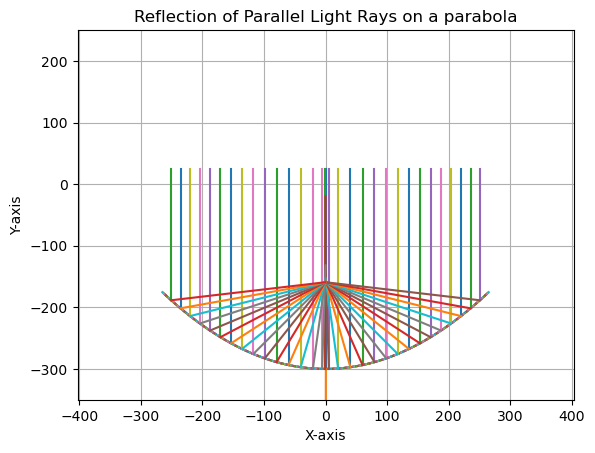

In [1305]:
#center to edge parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
find_line_segments_like_parabola(line_segments_arrayR, line_segments_arrayL, -160, -300, None)
    
print_line_segments(line_segments_arrayR)
print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(None)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# # set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)

# plt.xlim(-10, 10)
# plt.ylim(-310, -290)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()

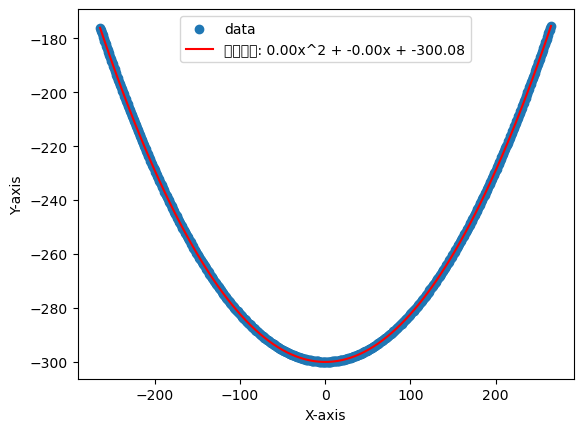

拟合曲线方程: 0.00177706x^2 + -0.00001372x + -300.08093874


In [1306]:
tag = 1 

points_array = []
x = []
y = []
for i in range(300):
    points_array.append(line_segments_arrayL[i].get_endpoints()[tag])
    points_array.append(line_segments_arrayR[i].get_endpoints()[tag])
for i in range(600):
    x.append(points_array[i][0])
    y.append(points_array[i][1])

degree = 2
coefficients = np.polyfit(x, y, degree)


x_fit = np.linspace(min(x), max(x), 100)

y_fit = np.polyval(coefficients, x_fit)

plt.scatter(x, y, label='data')
plt.plot(x_fit, y_fit, color='red', label=f'拟合曲线: {coefficients[0]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.show()

equation = f'{coefficients[0]:.8f}x^2 + {coefficients[1]:.8f}x + {coefficients[2]:.8f}'
print(f'拟合曲线方程: {equation}')


## edge to center parabola

In [1307]:
def egde_slope(endpoint, tag, k1 = None):
     # r0 l1
    x0 = endpoint[0]
    y0 = endpoint[1]
    y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value

def find_line_segments_like_parabola_ends(left_endpoint1, right_endpoint1, line_segments_arrayR, line_segments_arrayL, degree = None):


    # left_endpoint1 = (-width, height)
    # right_endpoint1 = (width, height)
    slope1 = -1
    # slope1 = egde_slope(left_endpoint1, 1, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    print(line1.get_slope())
    
    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, -160, 1, degree)
        print(slope_to_insert)
        updateRight(line_segments_arrayL, index_to_insert, slope_to_insert)

    print("###########################################################")

    slope1 = 1
    # slope1 = egde_slope(right_endpoint1, 0, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, -160, 0, degree)
        print(slope_to_insert)
        updateLeft(line_segments_arrayR, index_to_insert, slope_to_insert)

Line 300 - Midpoint: (-247.7740307362299, -147.30244851305443)
Line 300 - Endpoints: ((-248.0858100388078, -146.91156020869624), (-247.46225143365194, -147.69333681741261))
Line 300 - Slope: -1.253733975046259
Line 300 - intercept: -457.94516898122185

Line 300 - Midpoint: (277.80029996735414, -205.87344560559526)
Line 300 - Endpoints: ((277.39210944908416, -206.1622024250723), (278.2084904856241, -205.58468878611822))
Line 300 - Slope: 0.7074069743238639
Line 300 - intercept: -402.391315271763

-1
-1.2541427863677748
-1.2502458311980051
-1.2463480639497686
-1.2424494830493442
-1.2385500869761468
-1.234649874263616
-1.2307488435001228
-1.22684699332988
-1.2229443224538716
-1.2190408296307873
-1.2151365136779742
-1.2112313734723945
-1.2073254079516
-1.2034186161147158
-1.1995109970234354
-1.1956025498030305
-1.1916932736433705
-1.1877831677999549
-1.1838722315949586
-1.179960464418289
-1.1760478657286555
-1.1721344350546525
-1.1682201719958532
-1.1643050762239178
-1.1603891474837136
-1.1564723855944492
-1.1525547904508189
-1.148636362024164
-1.1447171003636425
-1.1407970055974173
-1.1368760779338518
-1.1329543176627248
-1.1290317251564532
-1.1251083008713316
-1.1211840453487845
-1.1172589592166304
-1.1133330431903632
-1.1094062980744421
-1.1054787247636002
-1.1015503242441622
-1.0976210975953793
-1.0936910459907763
-1.0897601706995124
-1.0858284730877559
-1.0818959546200737
-1.0779626168608323
-1.074028461475615
-1.0700934902326524
-1.0661577050042648
-1.0622211077683223
-1.058

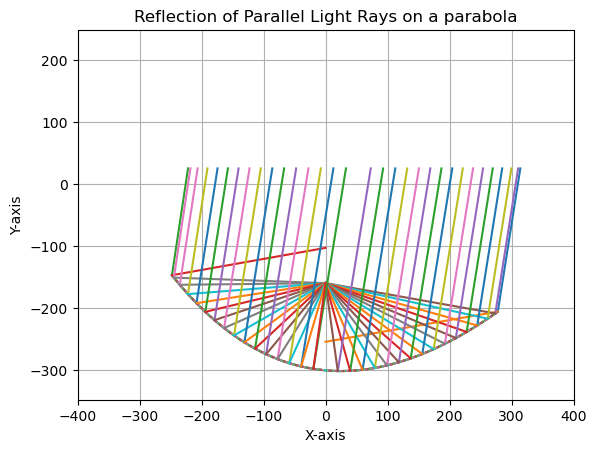

In [1308]:
#edge to center parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
left_endpoint1 = (-248.0858100388078, -146.91156020869624)
right_endpoint1 = (278.2084904856241, -205.58468878611822)
find_line_segments_like_parabola_ends(left_endpoint1, right_endpoint1, line_segments_arrayR, line_segments_arrayL, 80)
    
# print_line_segments(line_segments_arrayR)
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(80)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# # set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)

# plt.xlim(-10, 10)
# plt.ylim(-310, -290)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()

## Reflected into an interval

In [1309]:
def parabola_slope(index, line_segments_array, y, tag, k1 = None):

    existing_line = line_segments_array[index-1]

    endpoint = existing_line.get_endpoints()[tag] # r1 l0
    x0 = endpoint[0]
    y0 = endpoint[1]
    #y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value


    


def small_theta(dy, k1 = None): 
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    theta=(-(4*dy+1/k1)+((4*dy+1/k1)**2+4*(1+2*dy/k1)*(4.5+4*dy/k1))**0.5)/(2*(-4.5-4*dy/k1))
    #o=np.atan(0.0856964)
    return np.tan(theta)





def find_line_segments_Reflected_into_an_interval(line_segments_arrayR, line_segments_arrayL, y1, y2, bottom, degree = None):
    dy = y1/2 + y2/2 -bottom
    left_endpoint1 = (0, -300)
    right_endpoint1 = (0, -300)

    slope1 = small_theta(dy, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    print(line1.get_slope())

    y_values = np.linspace(y1, y2, 300)

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, y_values[i], 0, degree)
        print(slope_to_insert)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)

    print("###########################################################")


    slope1 = small_theta(dy, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, y_values[i], 1, degree)
        print(slope_to_insert)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)




-0.2585446079981004
-0.27062288954132674
-0.2733150339951733
-0.2760321138459114
-0.2787744656743838
-0.2815424315530062
-0.2843363591407495
-0.2871566017795453
-0.2900035185921166
-0.29287747458124014
-0.2957788407304378
-0.2987079941060993
-0.30166531796103624
-0.3046512018394616
-0.3076660416833952
-0.31071023994048397
-0.3137842056732367
-0.31688835466965637
-0.3200231095552657
-0.32318889990651023
-0.3263861623655233
-0.32961534075623833
-0.3328768862018252
-0.3361712572434363
-0.33949891996022785
-0.3428603480906396
-0.3462560231548988
-0.3496864345787163
-0.35315207981814134
-0.3566534644855386
-0.36019110247664043
-0.36376551609863905
-0.3673772361992642
-0.37102680229679885
-0.37471476271097637
-0.37844167469470524
-0.38220810456655485
-0.38601462784394025
-0.3898618293769349
-0.39375030348264106
-0.39768065408003483
-0.40165349482521173
-0.4056694492469397
-0.4097291508824368
-0.4138332434132741
-0.41798238080130723
-0.4221772274245349
-0.42641845821277524
-0.4307067587830505

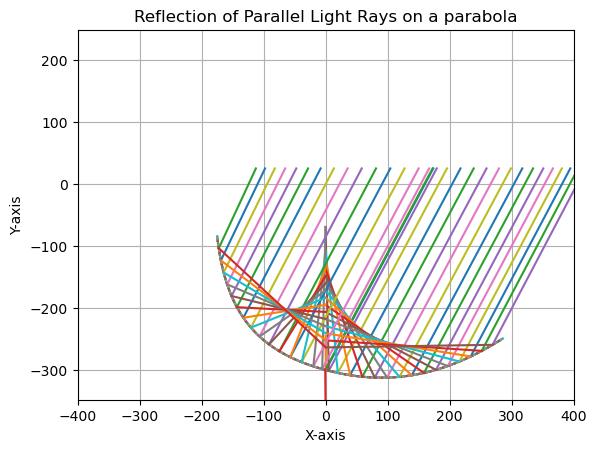

In [1310]:
#center to edge parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
find_line_segments_Reflected_into_an_interval(line_segments_arrayR, line_segments_arrayL, -105, -275, -300, 60)
    
# print_line_segments(line_segments_arrayR)
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(60)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# # set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)

# plt.xlim(-10, 10)
# plt.ylim(-310, -290)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()

## Curve fitting

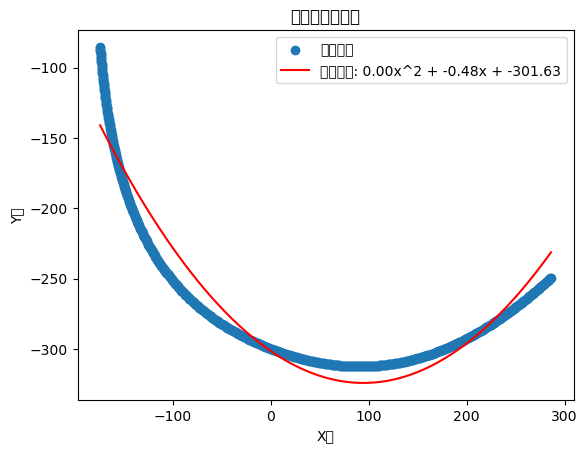

拟合曲线方程: 0.00x^2 + -0.48x + -301.63


In [1311]:
tag = 1 

points_array = []
x = []
y = []
for i in range(300):
    points_array.append(line_segments_arrayL[i].get_endpoints()[tag])
    points_array.append(line_segments_arrayR[i].get_endpoints()[tag])
for i in range(600):
    x.append(points_array[i][0])
    y.append(points_array[i][1])

# 进行多项式拟合
degree = 2  # 选择多项式的次数，这里选择二次多项式
coefficients = np.polyfit(x, y, degree)

# 生成拟合曲线的x值
x_fit = np.linspace(min(x), max(x), 100)
# 计算拟合曲线的y值
y_fit = np.polyval(coefficients, x_fit)

# 绘制原始数据和拟合曲线
plt.scatter(x, y, label='原始数据')
plt.plot(x_fit, y_fit, color='red', label=f'拟合曲线: {coefficients[0]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}')
plt.legend()
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.title('多项式拟合示例')
plt.show()

# 输出拟合曲线的方程
equation = f'{coefficients[0]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}'
print(f'拟合曲线方程: {equation}')


## copy with data

In [1312]:
intercept_array = []

def find_intercepts(line_segments_arrayR,line_segments_arrayL,intercept_array):
    k1 = float('inf')
    #k1 = 1000000000
    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayR[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayR[i].get_endpoints()[1], slope=slope)
        intercept_array.append(line.intercept())

    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayL[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayL[i].get_endpoints()[0], slope=slope)
        intercept_array.append(line.intercept())

find_intercepts(line_segments_arrayR,line_segments_arrayL,intercept_array)


C:\Users\18318\AppData\Local\Temp\ipykernel_16884\597294958.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


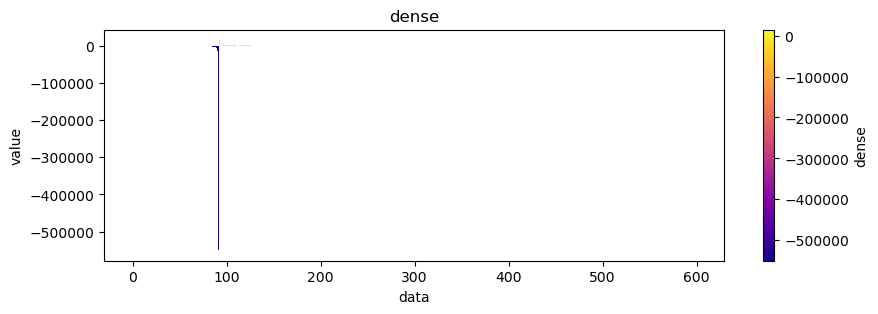

In [1313]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建示例数据
data = intercept_array

# 计算颜色映射值
colors = cm.plasma(data)

# 绘制条形图，并根据颜色映射值设置颜色
plt.figure(figsize=(10, 3))
#plt.bar(range(len(data)), height=data, color=colors)
plt.bar(range(len(data)), height=data, color=colors)

plt.title('dense')
plt.xlabel('data')
plt.ylabel('value')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma')
sm.set_array(data)
cbar = plt.colorbar(sm)
cbar.set_label('dense')

plt.show()


In [1314]:
def find_minimal_interval(arr):
    arr.sort()  # 先对数组进行排序
    #min_count = float('inf')  # 初始化最小个数为正无穷大

    max_count = 0
    optimal_interval = []
    position = 0

    for i in range(round(arr[0]),round(arr[-1]-20)):
        current_interval = []
        for j in range(len(arr)):
            if (i + 20 > arr[j] and i < arr[j]):
                current_interval.append(arr[j])
                j = j + 1
        count = len(current_interval)

        if count > max_count:
            max_count = count
            optimal_interval = current_interval
            position = i


    print("最da个数的区间：[", position, ",", position + 20, "] 个数：", max_count)
    return optimal_interval

# # 示例用法
# my_array = intercept_array
# result = find_minimal_interval(my_array)
# print("最da个数的区间：", result)


Line 300 - Endpoints: ((251.89970830693642, -162.93119722619133), (252.44141231337693, -162.09062791351909))



Line 300 - Midpoint: (-252.17056031015667, -162.5109125698552)
Line 300 - Endpoints: ((-252.44141231337693, -162.09062791351909), (-251.89970830693642, -162.93119722619133))
Line 300 - Slope: -1.551713302243349
Line 300 - intercept: -553.807325437284